In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

df=pd.read_csv("creditcard.csv")

#Undersampling
#Shuffle all dataset
#shuffled_df=df.sample(frac=1,random_state=4)

#Putting all fraud dataset into seperate one
#fraud_df=shuffled_df.loc[shuffled_df["Class"]==1]

#Randomly select 492 non-fraud data 
#non_fraud_df=shuffled_df.loc[shuffled_df["Class"]==0].sample(n=492,random_state=42)

#concat both dataframes
#df=pd.concat([fraud_df,non_fraud_df])


from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = df.columns

print(oversampled_train.shape)
oversampled_train.head()

(568630, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
oversampled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [38]:
oversampled_train.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
oversampled_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [40]:
oversampled_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87861.913493,-2.476877,1.910150,-3.644683,2.326261,-1.624067,-0.718674,-2.924462,0.279024,-1.328312,...,0.395796,-0.008619,-0.004749,-0.054934,0.026876,0.029172,0.081398,0.041640,95.489628,0.5
std,48161.914552,5.450422,3.633499,6.153232,3.142734,4.134399,1.706687,5.699271,4.947529,2.222786,...,2.838443,1.162101,1.012541,0.540068,0.612546,0.447712,0.949628,0.418391,220.413386,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,46048.000000,-3.061417,-0.098598,-5.224231,-0.055369,-1.819790,-1.552096,-3.257194,-0.196938,-2.317097,...,-0.157817,-0.499239,-0.223971,-0.384864,-0.302009,-0.266181,-0.067411,-0.057163,3.352126,0.0
50%,80385.000000,-0.819213,1.015966,-1.550175,1.482336,-0.444700,-0.694436,-0.753451,0.169132,-0.809711,...,0.162449,0.021866,-0.027111,-0.007618,0.044700,-0.005621,0.058593,0.036728,25.000000,0.5
75%,134768.998403,0.821546,2.885333,0.268185,4.340464,0.430733,0.022943,0.185252,0.852448,0.078561,...,0.648051,0.525847,0.186847,0.339882,0.367812,0.309138,0.433475,0.213485,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


In [41]:
#Number of fraud and not fraud

class_names={1:"Fraud",0:"Not Fraud"}
#print(df.Class.value_counts())
print(oversampled_train.Class.value_counts().rename(index=class_names))

Not Fraud    284315
Fraud        284315
Name: Class, dtype: int64


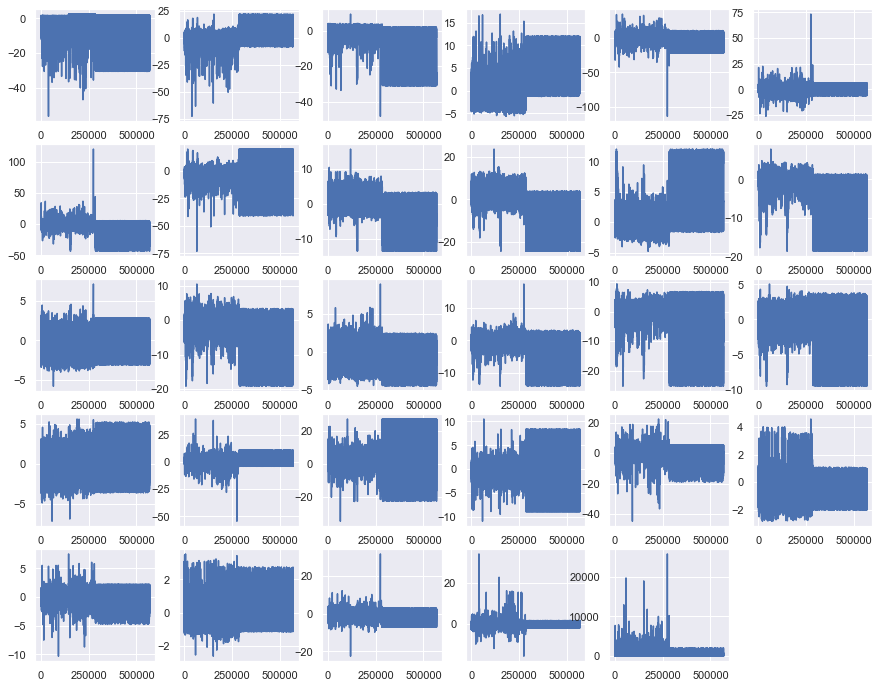

In [42]:
#Plotting features

fig=plt.figure(figsize=(15,12))

plt.subplot(5,6,1);plt.plot(oversampled_train.V1)
plt.subplot(5,6,2);plt.plot(oversampled_train.V2)
plt.subplot(5,6,3);plt.plot(oversampled_train.V3)
plt.subplot(5,6,4);plt.plot(oversampled_train.V4)
plt.subplot(5,6,5);plt.plot(oversampled_train.V5)
plt.subplot(5,6,6);plt.plot(oversampled_train.V6)
plt.subplot(5,6,7);plt.plot(oversampled_train.V7)
plt.subplot(5,6,8);plt.plot(oversampled_train.V8)
plt.subplot(5,6,9);plt.plot(oversampled_train.V9)
plt.subplot(5,6,10);plt.plot(oversampled_train.V10)
plt.subplot(5,6,11);plt.plot(oversampled_train.V11)
plt.subplot(5,6,12);plt.plot(oversampled_train.V12)
plt.subplot(5,6,13);plt.plot(oversampled_train.V13)
plt.subplot(5,6,14);plt.plot(oversampled_train.V14)
plt.subplot(5,6,15);plt.plot(oversampled_train.V15)
plt.subplot(5,6,16);plt.plot(oversampled_train.V16)
plt.subplot(5,6,17);plt.plot(oversampled_train.V17)
plt.subplot(5,6,18);plt.plot(oversampled_train.V18)
plt.subplot(5,6,19);plt.plot(oversampled_train.V19)
plt.subplot(5,6,20);plt.plot(oversampled_train.V20)
plt.subplot(5,6,21);plt.plot(oversampled_train.V21)
plt.subplot(5,6,22);plt.plot(oversampled_train.V22)
plt.subplot(5,6,23);plt.plot(oversampled_train.V23)
plt.subplot(5,6,24);plt.plot(oversampled_train.V24)
plt.subplot(5,6,25);plt.plot(oversampled_train.V25)
plt.subplot(5,6,26);plt.plot(oversampled_train.V26)
plt.subplot(5,6,27);plt.plot(oversampled_train.V27)
plt.subplot(5,6,28);plt.plot(oversampled_train.V28)
plt.subplot(5,6,29);plt.plot(oversampled_train.Amount)


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
feature_names=oversampled_train.iloc[:,1:30].columns
target=oversampled_train.iloc[:1,30:].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [45]:
data_features=oversampled_train[feature_names]
data_target=oversampled_train[target]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(data_features,data_target,train_size=0.7,test_size=0.3,random_state=1)

print("Length of X_train: {}".format(len(X_train)))
print("Length of X_test: {}".format(len(X_test)))
print("Length of y_train: {}".format(len(y_train)))
print("Length of y_test: {}".format(len(y_test)))

Length of X_train: 398041
Length of X_test: 170589
Length of y_train: 398041
Length of y_test: 170589


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [56]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [57]:
prediction=model.predict(X_test)

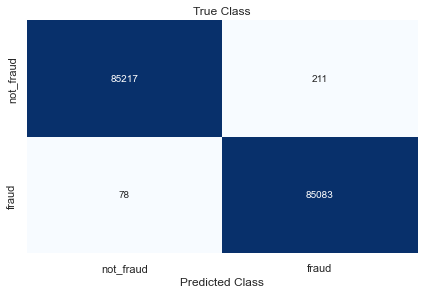

In [58]:
class_names=["not_fraud","fraud"]
matrix=confusion_matrix(y_test,prediction)

#creating pandas dataframe
dataframe=pd.DataFrame(matrix,index=class_names,columns=class_names)

#creating heatmap
sns.heatmap(dataframe,annot=True,cbar=None,cmap="Blues",fmt="g")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.title("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [59]:
from sklearn.metrics import f1_score,recall_score,accuracy_score
f1_score=f1_score(y_test,prediction)
recall_score=recall_score(y_test,prediction)
accuracy_score=accuracy_score(y_test,prediction)

print("Sensitivity/Recall for Logistic Regression Model: {}".format(recall_score))
print("F1 score for Logistic Regression Model: {}".format(f1_score))
print("Precision for Logisitic Regression Model: {}".format(accuracy_score))


Sensitivity/Recall for Logistic Regression Model: 0.9990840877866629
F1 score for Logistic Regression Model: 0.9983045378545657
Precision for Logisitic Regression Model: 0.9983058696633429
